<a href="https://colab.research.google.com/github/urvashi-agrawal-dev/Iris-Flower-Classifier-using-Machine-Learning/blob/main/Irisload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#loading & exploring the dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

X['species'] = y
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


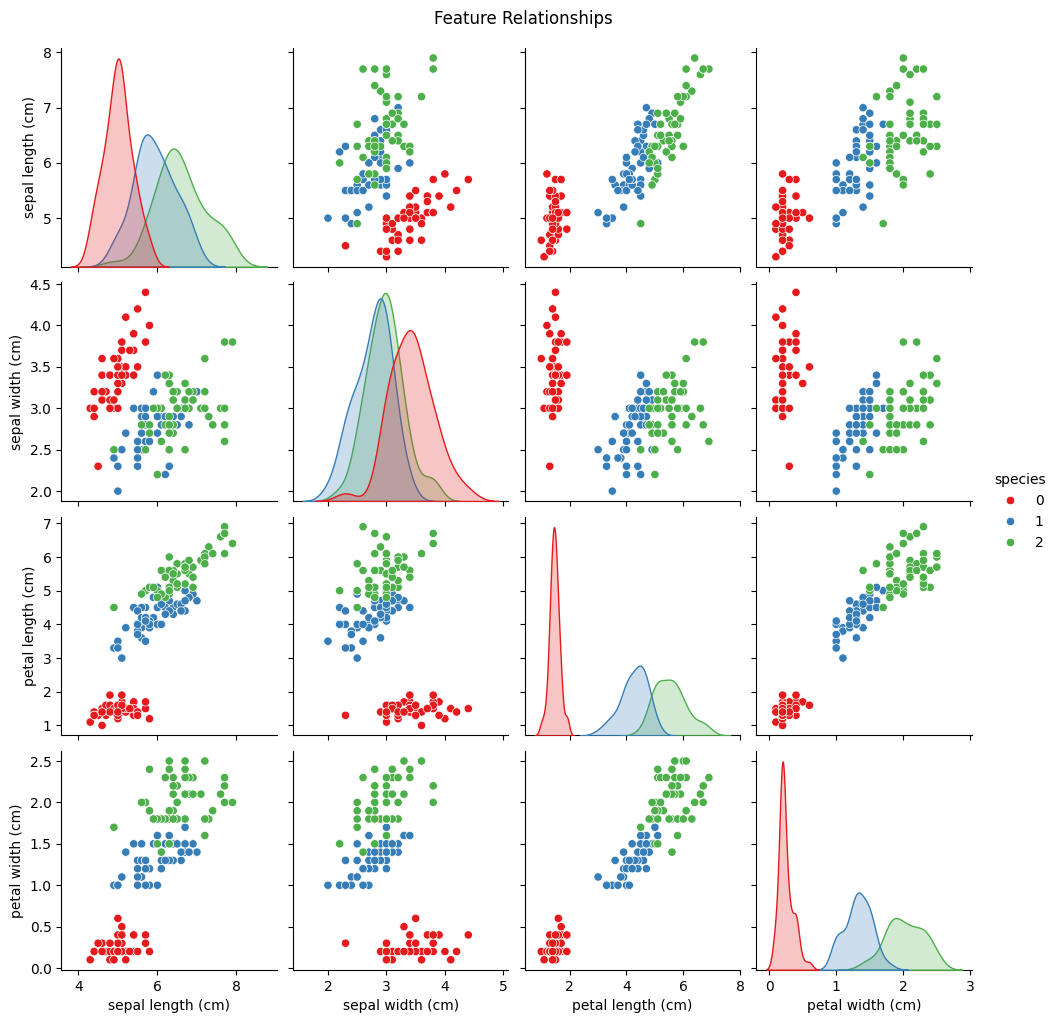

In [15]:
#visulaize the features
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X, hue='species', palette='Set1')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


In [16]:
#train a classider we will use KNN For simplicity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = iris.data[:, 2:4]  # Using only petal length and petal width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 1.0


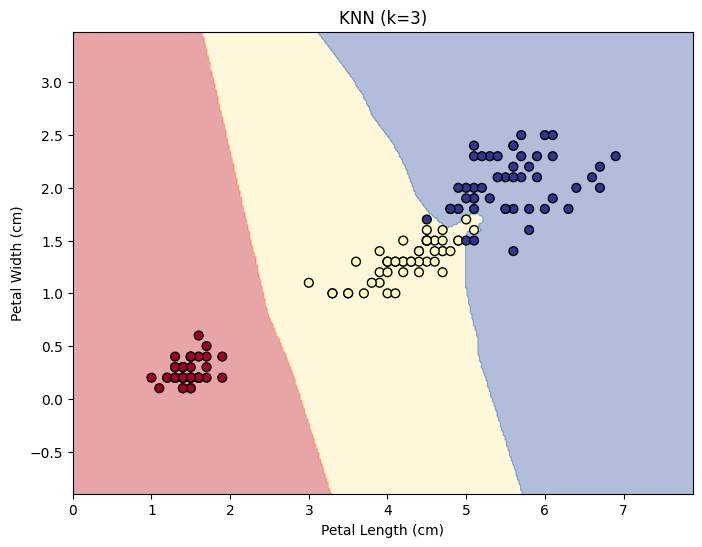

In [17]:
#Visualize Decision Boundaries
#see how the classifier separates the 3 flower types using just 2 features (petal length and width) in a 2D plane.
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh to plot decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("KNN (k=3)")
plt.show()
